In [95]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
dataset = pd.read_excel('DATASET.xlsx')

In [98]:
dataset.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [99]:
clearing_index = 850
listClear = []
for i in range(9):
  listClear.append(clearing_index+i)
listClear
dataset.fillna(0, inplace=True)
dataset.drop(listClear, inplace = True)

In [100]:
dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Name_of_Section')

In [101]:
multiply = 9
k = 0
for i in range(100):
  Name_of_Section = dataset.iloc[k,0]
  dataset.iloc[k:k + multiply, 0] = Name_of_Section
  k += multiply
test_frame = dataset.loc[dataset['year'] == 9]
dataset.head()

,Name_of_Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [102]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=19)

In [103]:
move = 9
def extracting_xtrain(dataset, start_r, start_c):
  end_r = start_r + move
  return dataset.iloc[start_r:end_r, 1:10]

In [104]:
def extracting_ytrain(dataset, start_r, start_c):
  end_r = start_r + move
  return dataset.iloc[start_r:end_r, start_c]

In [105]:
def extracting_xtest(dataset, start_r):
  end_r = start_r + move
  return dataset.iloc[end_r, 1:10].to_numpy()

In [106]:
def extracting_ytest(dataset, start_r, start_c):
  end_r = start_r + move
  return dataset.iloc[end_r, start_c]

In [107]:
def calcuating_lmse(predicted_val, testing_val):
  predicted_diff = predicted_val - testing_val
  return (predicted_diff)**2

In [108]:
column_name = ["Para-"+str(i) for i in range(9,14)]
X_Y = []
def getX_Ysplit(dataset, start_r, end_r):
  X_Y = []
  X_Y.append(extracting_xtrain(dataset, start_r, end_r))
  X_Y.append(extracting_ytrain(dataset, start_r, end_r))
  X_Y.append(extracting_xtest(dataset,start_r))
  X_Y.append(extracting_ytest(dataset,start_r,end_r))
  return X_Y

In [109]:
from collections import defaultdict

In [110]:
predicted_values = defaultdict(lambda : [])

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
target_c = [10,11,12,13,14]
rootMeanSquareError = []
totalCount = 0
current_section = 0
total_squared_error = 0
max_val = 1000
for j in target_c:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getX_Ysplit(dataset,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypredicted = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    predicted_values[column_name[current_section]].append(ypredicted)
    
    # store squared difference for RMSE

    # local_squared_error = calcuate_lmse(ypred, y_test) + local_squared_error
    total_squared_error = calcuating_lmse(ypredicted, y_test) + total_squared_error
    l_count += 1
    totalCount += 1

  # root_mean_square_error.append(local_squared_error)
  current_section += 1
predicted_dataset = pd.DataFrame.from_dict(predicted_values)

In [113]:
total_rootMeanSquareError = total_squared_error/totalCount
final_rootMeanSquareError = total_rootMeanSquareError**0.5

print("The RMSE is " + str(final_rootMeanSquareError))

The RMSE is 68.79261235937643


In [114]:
dataset

,Name_of_Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,0,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,0,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,0,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,0,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [115]:
ploting_row = 35

random_of_rows = []
for i in range(ploting_row):
  random_of_rows.append(random.randint(0,90))

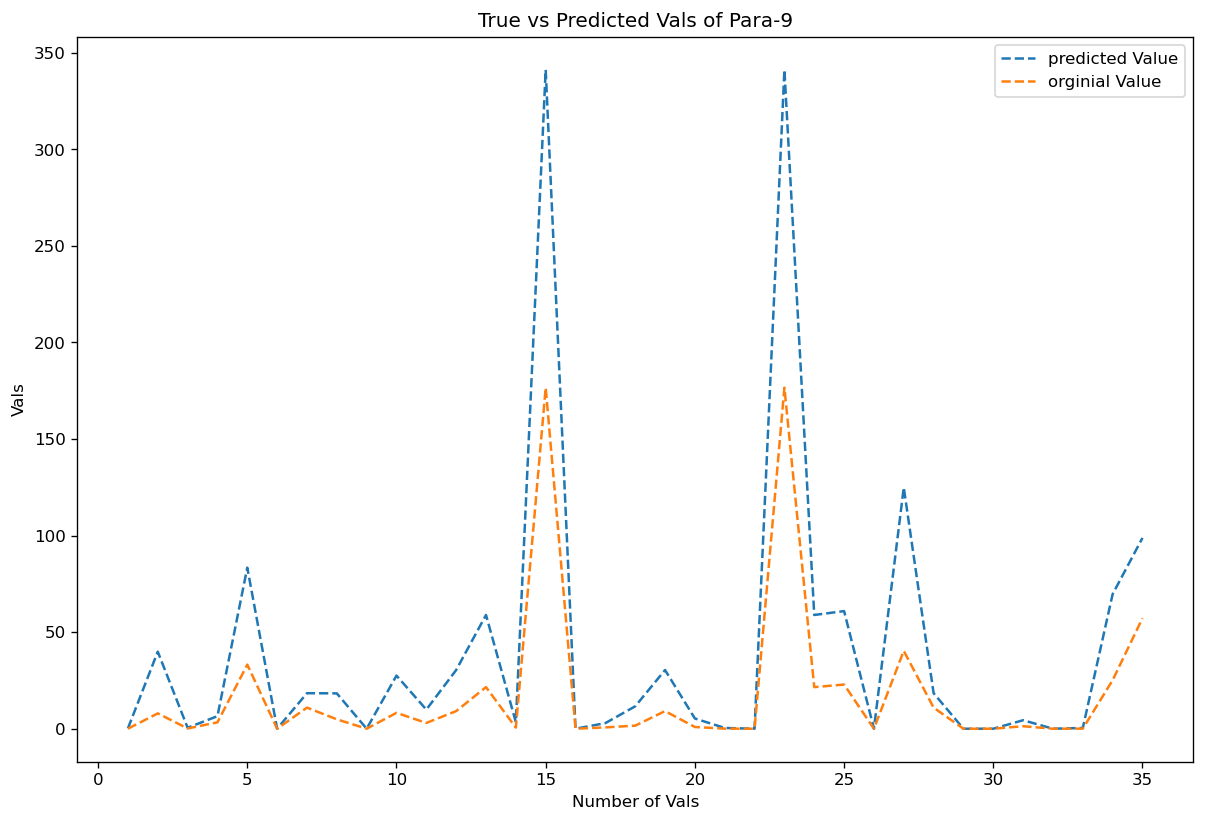

In [116]:
figure(figsize=(12, 8), dpi=120)
true_value = predicted_dataset.iloc[random_of_rows, 0]
predicted_value = test_frame.iloc[random_of_rows,10]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dashed', label = 'predicted Value')
plt.plot(x_value,true_value, linestyle = 'dashed', label = 'orginial Value')
plt.xlabel('Number of Vals')
plt.ylabel('Vals')
plt.title('True vs Predicted Vals of Para-9')
plt.legend(loc = 'upper right')

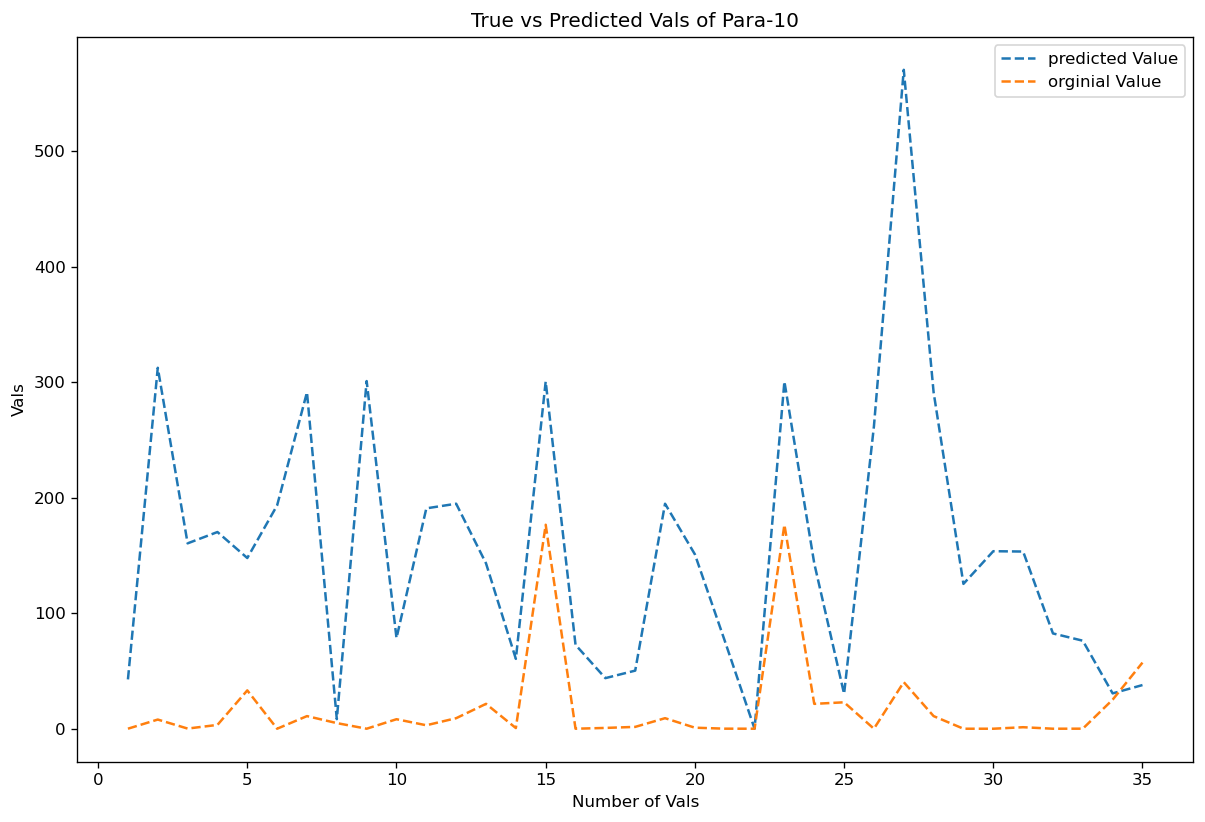

In [117]:
figure(figsize=(12, 8), dpi=120)
true_value = predicted_dataset.iloc[random_of_rows, 0]
predicted_value = test_frame.iloc[random_of_rows,11]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dashed', label = 'predicted Value')
plt.plot(x_value,true_value, linestyle = 'dashed', label = 'orginial Value')
plt.xlabel('Number of Vals')
plt.ylabel('Vals')
plt.title('True vs Predicted Vals of Para-10')
plt.legend(loc = 'upper right')

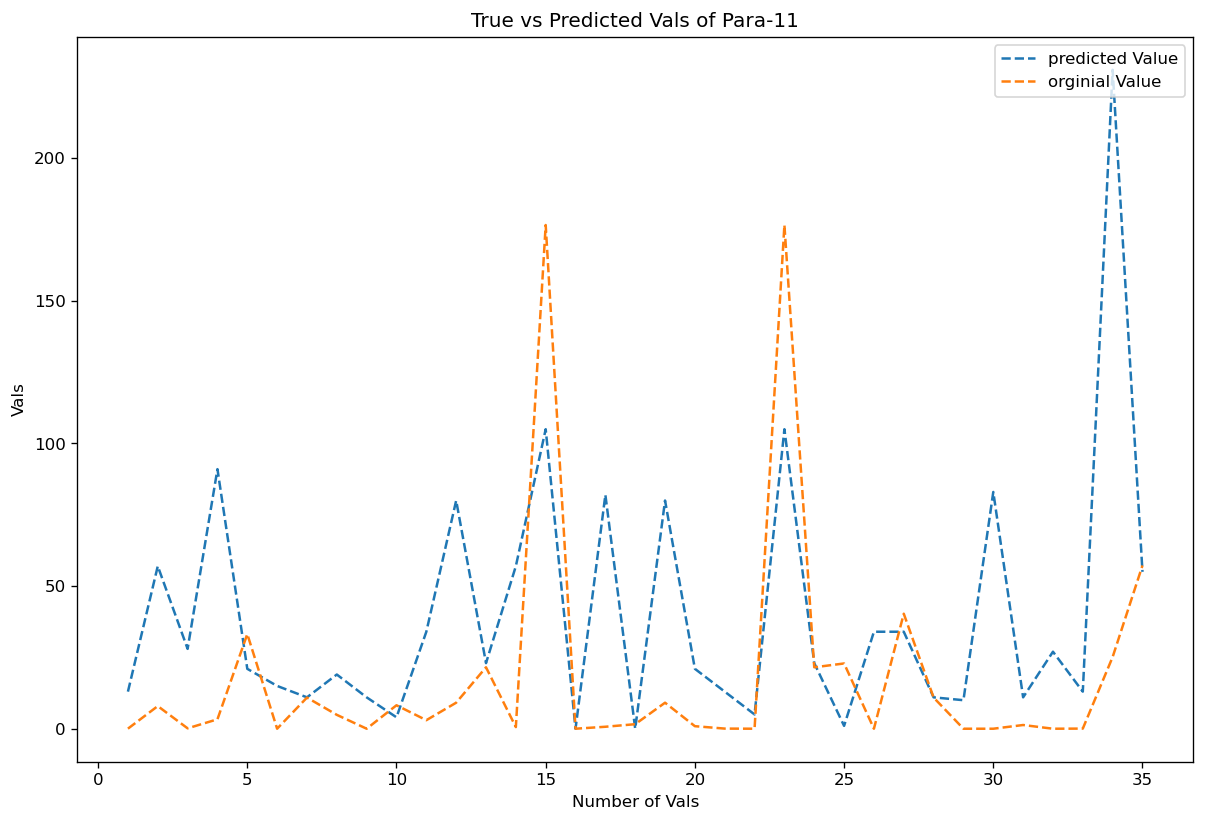

In [118]:
figure(figsize=(12, 8), dpi=120)
true_value = predicted_dataset.iloc[random_of_rows, 0]
predicted_value = test_frame.iloc[random_of_rows,12]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dashed', label = 'predicted Value')
plt.plot(x_value,true_value, linestyle = 'dashed', label = 'orginial Value')
plt.xlabel('Number of Vals')
plt.ylabel('Vals')
plt.title('True vs Predicted Vals of Para-11')
plt.legend(loc = 'upper right')

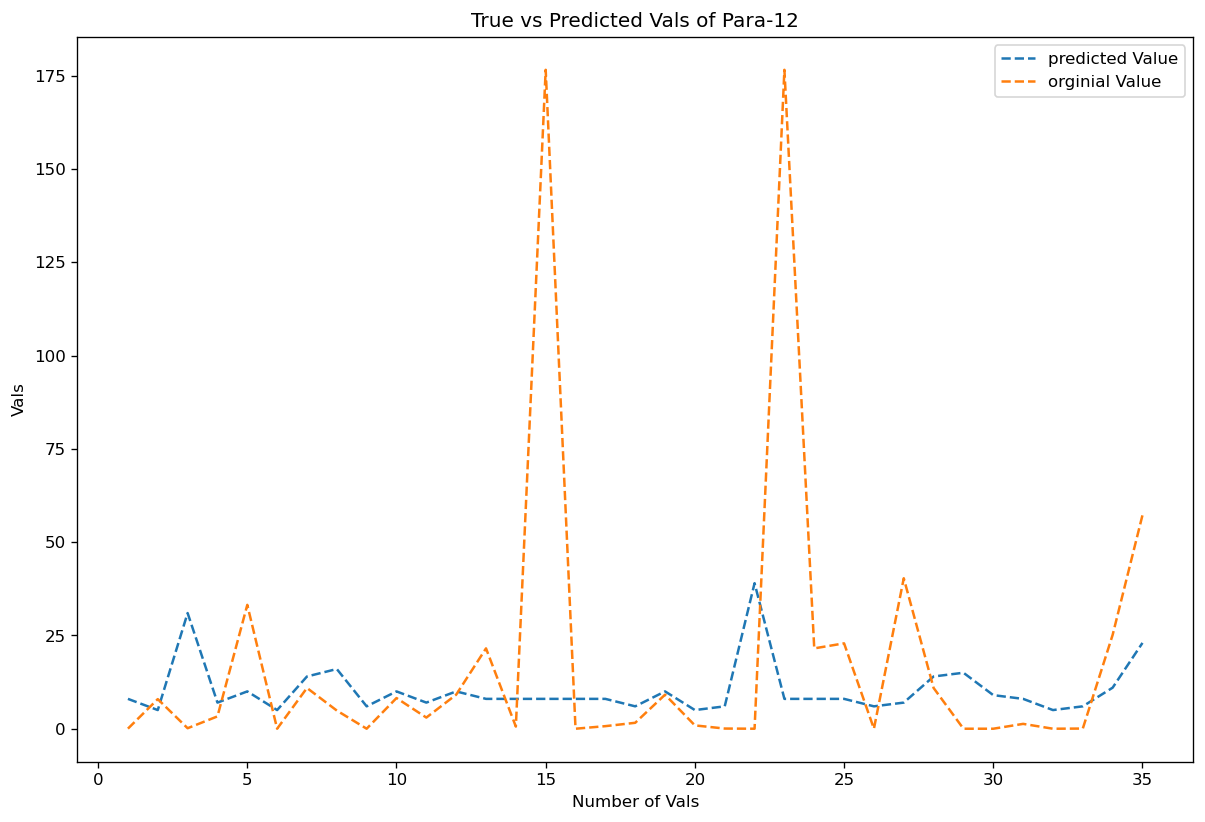

In [119]:
figure(figsize=(12, 8), dpi=120)
true_value = predicted_dataset.iloc[random_of_rows, 0]
predicted_value = test_frame.iloc[random_of_rows,13]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dashed', label = 'predicted Value')
plt.plot(x_value,true_value, linestyle = 'dashed', label = 'orginial Value')
plt.xlabel('Number of Vals')
plt.ylabel('Vals')
plt.title('True vs Predicted Vals of Para-12')
plt.legend(loc = 'upper right')

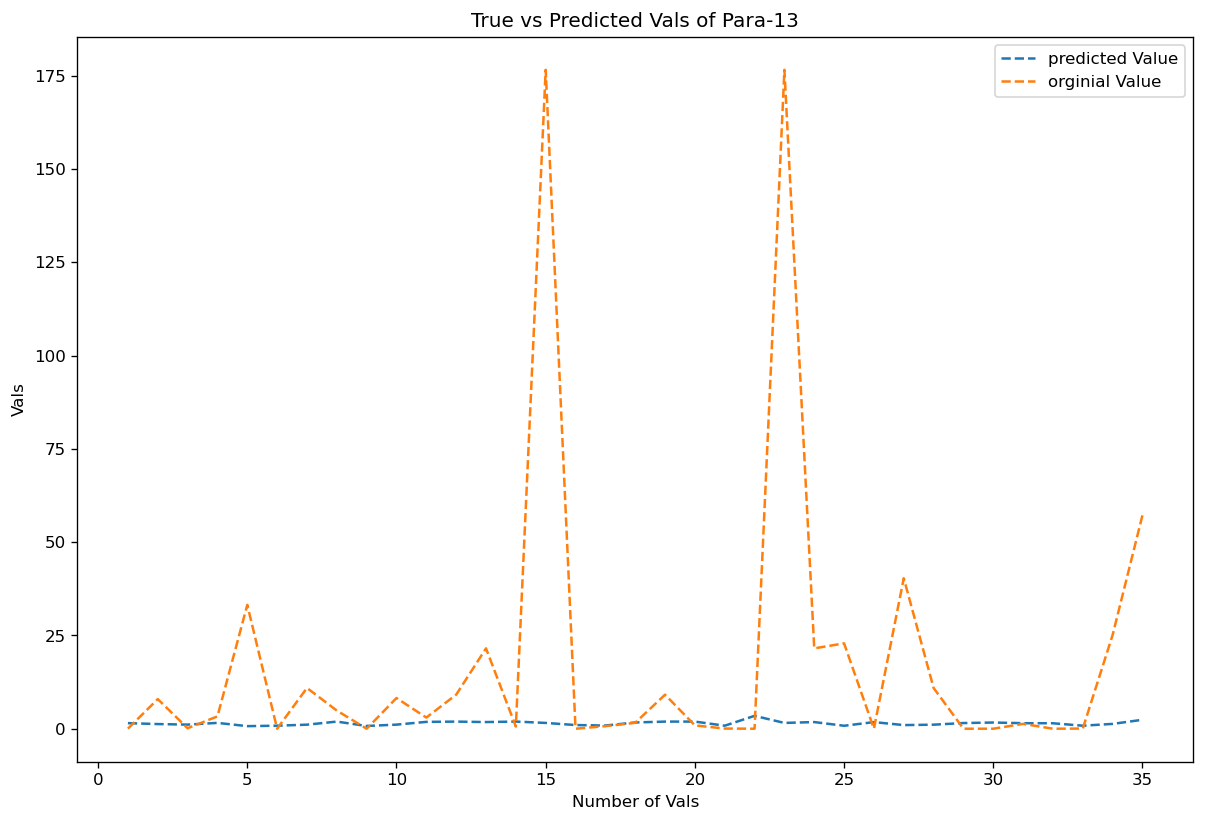

In [120]:
figure(figsize=(12, 8), dpi=120)
true_value = predicted_dataset.iloc[random_of_rows, 0]
predicted_value = test_frame.iloc[random_of_rows,14]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dashed', label = 'predicted Value')
plt.plot(x_value,true_value, linestyle = 'dashed', label = 'orginial Value')
plt.xlabel('Number of Vals')
plt.ylabel('Vals')
plt.title('True vs Predicted Vals of Para-13')
plt.legend(loc = 'upper right')